# Plotting MOF rates

### Loading modules

In [4]:
from matplotlib.pyplot import figure,show,plot,errorbar,subplots,xlabel,ylabel,subplots_adjust,savefig,gca,legend,xlim,annotate
from matplotlib import rc
from numpy import loadtxt,arange,array,sqrt,linspace,append,nanmax
from mof_lattice import MOF_lattice,MOF_data,MOF
from os import listdir,getcwd,path,walk
from seaborn import color_palette,set_palette

In [2]:
color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
set_palette('colorblind')

In [4]:
%matplotlib notebook

#### Parameters
n: number of points <br/>
off: offset

In [5]:
n=100
off=0.0075

### Loading MOF calculated data

In [6]:
f=MOF("MOF_quench/20/")

### Temperature and chemical potential ranges

In [7]:
temp=linspace(f.path.min()-0.01,f.path.max()+0.01,n)
mu=f.mu*temp

### Calculating theoretical values

In [8]:
mof=MOF_lattice(f.length,f.E_s,f.E_m,f.E_t)
rho=mof.get_loading(mu,temp)

### Plotting the theoretical values

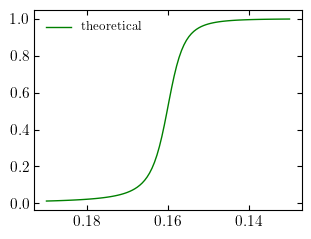

In [9]:
figure()
plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")
legend(frameon=False)
gca().invert_xaxis()
show()

### Folders to read

In [10]:
d=next(walk('.'))[1]
d=[a for a in d if a.isdigit()]
d=sorted(d,key=lambda x: int(x))

d=['10','11','12','13','15','20']
d=d[::-1]
b=[]
for a in d:
    b+=['MOF_quench/'+a]
d=b
print(d)

['MOF_quench/20', 'MOF_quench/15', 'MOF_quench/13', 'MOF_quench/12', 'MOF_quench/11', 'MOF_quench/10']


### Reading and plotting MOF data with various temperature ramp rates

<IPython.core.display.Javascript object>


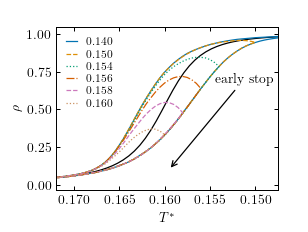

In [11]:
#plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")
fig,ax=subplots()

plot(temp,rho,'k-',linewidth=1.0)

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['-', '--', ':','-.','--',':'])

for a in d:
    f=MOF(a)
    #errorbar(f.path,f.rho.mean,yerr=sqrt(f.rho.var),linewidth=1.00,elinewidth=6.00,ecolor="y",barsabove=True,color="r",alpha=0.66)
    #ax1.vlines(f.path,ymin=f.rho.min,ymax=f.rho.max,linewidth=0.66,alpha=1.0)
    
    #l=float(f.isobar[0])/80.0*100
    t=(int(len(f.path)/2))
    l=(f.path[t-1])
    
    plot(f.path,f.rho.mean,
         #markersize=1.0,
         linewidth=1.0,
         #alpha=1.0,
         #label="$T^*={:.3f}$".format(l))
         label="${:.3f}$".format(l))

annotate(r"early stop",xy=(0.1595,0.1),xytext=(0.1545,0.7),
         arrowprops=dict(arrowstyle="->"),textcoords='data',va='center')

legend(frameon=False,loc=2,handlelength=1,labelspacing=0.2)
xlim(f.path.min()+off,f.path.max()-off)
xlim(0.1475,0.172)

gca().invert_xaxis()

xlabel(r"$T^*$")
ylabel(r"$\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_quench.png")
savefig("mof_quench.pdf")

show()

In [12]:
import pandas as pd

In [13]:
xl_file=pd.ExcelFile('e-2-Mg2dobpdc_hysteresis-tests_final.xlsx')

In [14]:
print(xl_file.sheet_names)

['quench', 'rates', 'bare-Mg2dobpdc', 'e-2-Mg2dobpdc']


#### Read columns fce

In [15]:
def read_columns(a=[0,1],b=[4,5]):
    a1=pd.read_excel(xl_file,sheet_name='quench',usecols=a,header=8)
    a2=pd.read_excel(xl_file,sheet_name='quench',usecols=b,header=8)

    T1,rho1=a1.values.transpose()
    T2,rho2=a2.values.transpose()
    
    T=append(T1,T2)
    rho=append(rho1,rho2)
    
    return T,rho

In [16]:
_T=[]
_rho=[]
cols=[
    {'a':[0,1],'b':[4,5]},
    {'a':[32,33],'b':[36,37]},
    {'a':[24,25],'b':[28,29]},
    {'a':[16,17],'b':[20,21]},
    {'a':[8,9],'b':[12,13]}  
     ]
for a in cols:
    T,rho=read_columns(a=a['a'],b=a['b'])
    _T+=[T]
    _rho+=[rho]

#### Reading data

<IPython.core.display.Javascript object>


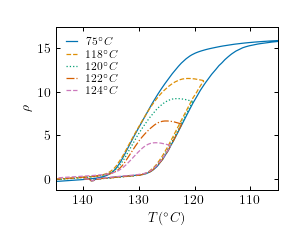

In [17]:
fig,ax=subplots()

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['-', '--', ':','-.','--',':'])

labels=['75','118','120','122','124']

for T,rho,label in zip(_T,_rho,labels):
    plot(T,rho,
         linewidth=1.0,
         label=label+"${^\circ}C$")

legend(frameon=False,loc=2,handlelength=1,labelspacing=0.2)
xlim(105,145)

gca().invert_xaxis()

xlabel(r"$T(^\circ C)$")
ylabel(r"$\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_quench_exp.png")
savefig("mof_quench_exp.pdf")
    
show()

# Plotting MOF rates

#### Parameters

n: number of points <br/>
off: offset

In [1]:
from matplotlib.pyplot import figure,show,plot,errorbar,subplots,xlabel,ylabel,subplots_adjust,savefig,gca,legend,xlim,annotate
from matplotlib import rc
from numpy import loadtxt,arange,array,sqrt,linspace,append,nanmax
from mof_lattice import MOF_lattice,MOF_data,MOF
from os import listdir,getcwd,path,walk
from seaborn import color_palette,set_palette

In [2]:
n=100
off=0.003

### Loading MOF calculated data

In [3]:
f=MOF("MOF_rates/400")

### Temperature and chemical potential ranges

In [4]:
temp=linspace(f.path.min()-0.01,f.path.max()+0.01,n)
mu=f.mu*temp

### Calculating theoretical values

In [5]:
mof=MOF_lattice(f.length,f.E_s,f.E_m,f.E_t)
rho=mof.get_loading(mu,temp)
corr_length=mof.correlation_length(mu,temp)

In [6]:
hess=mof.hessian(mu,temp)

[12050.68735769  1815.5484206     14.5833542 ] 12050.687357693414
[11354.88240241  1661.6878804     14.13181981] 11354.882402406134
[10698.23923169  1520.40384353    13.68915569] 10698.239231685127
[10078.08017527  1390.6662725     13.25495241] 10078.080175265186
[9491.95490041 1271.53069529   12.82881977] 9491.954900408087
[8937.6183961  1162.13140423   12.41038647] 8937.618396100796
[8413.01172252 1061.67482325   11.9992995 ] 8413.01172252287
[7916.24442067  969.43364747   11.59522397] 7916.244420673341
[7445.57910284  884.74126266   11.1978428 ] 7445.579102840512
[6999.41764215  806.986579     10.80685646] 6999.417642147299
[6576.288692   735.6094409   10.421983 ] 6576.288692000235
[6174.8366273   670.09630088   10.04295805] 6174.836627295353
[5793.81153615  609.97622358    9.66953496] 5793.8115361457285
[5432.06025476  554.81731583    9.30148511] 5432.060254757209
[5088.51830928  504.22335779    8.9385983 ] 5088.518309284639
[4762.20256148  457.8307848     8.58068338] 4762.20256148

### Plotting the theoretical values

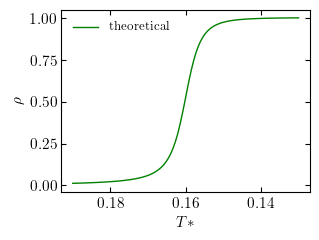

In [19]:
figure()
plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")
legend(frameon=False)
gca().invert_xaxis()

xlabel(r"$T*$")
ylabel(r"$\rho$")

subplots_adjust(left=0.18,bottom=0.18)

show()

<IPython.core.display.Javascript object>


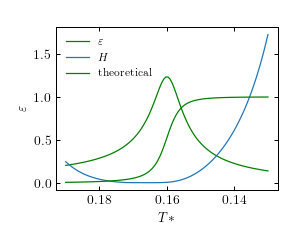

In [31]:
%matplotlib notebook
figure()
plot(temp,corr_length/3,'g-',linewidth=1.0,label=r"$\varepsilon$")

plot(temp,hess/7000.0,linewidth=1.0,label=r"$H$")

plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")

legend(frameon=False)
gca().invert_xaxis()

xlabel(r"$T*$")
ylabel(r"$\varepsilon$")

subplots_adjust(left=0.18,bottom=0.18)

show()

<IPython.core.display.Javascript object>


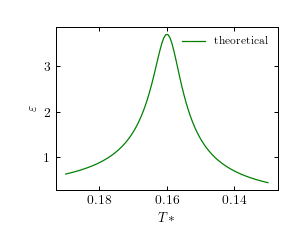

In [28]:
figure()
plot(temp,corr_length,'g-',linewidth=1.0,label=r"theoretical")
legend(frameon=False)
gca().invert_xaxis()

xlabel(r"$T*$")
ylabel(r"$\varepsilon$")

subplots_adjust(left=0.18,bottom=0.18)

show()

#### Folders to read

In [26]:
d=next(walk('MOF_rates'))[1]

d=['100','200','400']
b=[]
for a in d:
    b+=['MOF_rates/'+a]
d=b
print(d)

['MOF_rates/100', 'MOF_rates/200', 'MOF_rates/400']


### Reading and plotting MOF data with various temperature ramp rates

<IPython.core.display.Javascript object>


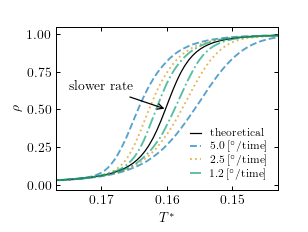

In [27]:
fig,ax=subplots()

plot(temp,rho,'k-',linewidth=1.0,label=r"theoretical")

ax.set_prop_cycle(color=color_palette('colorblind',3),linestyle=['--', ':', '-.'])

for a in d:
    f=MOF(a)
    #errorbar(f.path,f.rho.mean,yerr=sqrt(f.rho.var),linewidth=1.00,elinewidth=6.00,ecolor="y",barsabove=True,color="r",alpha=0.66)
    #ax1.vlines(f.path,ymin=f.rho.min,ymax=f.rho.max,linewidth=0.66,alpha=1.0)
    plot(f.path,f.rho.mean,
         #linewidth=0.66,
         markersize=1.0,
         alpha=0.66,
         label=r"$%.1lf\,[^\circ/\mathrm{time}]$"%(1e6*0.0005/(float(a[-3:]))))


    
annotate(r"slower rate",xy=(0.16,0.5),xytext=(0.175,0.625),arrowprops=dict(arrowstyle="->"))

legend(frameon=False,loc=4,handlelength=1,labelspacing=0.2)
xlim(f.path.min()+off,f.path.max()-off)

gca().invert_xaxis()

xlabel(r"$T^*$")
ylabel(r"$\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_rates.png")
savefig("mof_rates.pdf")

show()

In [28]:
import pandas as pd

In [29]:
xl_file=pd.ExcelFile('e-2-Mg2dobpdc_hysteresis-tests_final.xlsx')

In [30]:
print(xl_file.sheet_names)

['quench', 'rates', 'bare-Mg2dobpdc', 'e-2-Mg2dobpdc']


## Read columns fce

In [31]:
def read_columns(a=[0,1],b=[4,5]):
    a1=pd.read_excel(xl_file,sheet_name='rates',usecols=a,header=8)
    a2=pd.read_excel(xl_file,sheet_name='rates',usecols=b,header=8)

    T1,rho1=a1.values.transpose()
    T2,rho2=a2.values.transpose()
    
    T=append(T1,T2)
    rho=append(rho1,rho2)
    
    return T,rho

In [32]:
_T=[]
_rho=[]
cols=[
    {'a':[24,25],'b':[28,29]},
    {'a':[16,17],'b':[20,21]},
    {'a':[0,1],'b':[4,5]},    
    {'a':[8,9],'b':[12,13]}  
     ]
for a in cols:
    T,rho=read_columns(a=a['a'],b=a['b'])
    _T+=[T]
    _rho+=[rho]

## Plotting experimental data

<IPython.core.display.Javascript object>


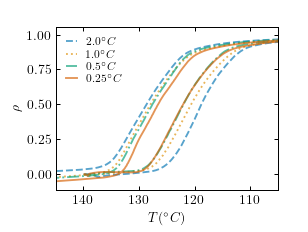

In [33]:
fig,ax=subplots()

ax.set_prop_cycle(color=color_palette('colorblind',6),linestyle=['--', ':', '-.','-',':','-.'])

labels=['0.25','0.5','1.0','2.0']

for T,rho,label in zip(_T[::-1],_rho[::-1],labels[::-1]):
    m=(nanmax(rho))
    plot(T,rho/m,
         #linewidth=1.0,
         alpha=0.66,
         label=label+"${^\circ}C$")

legend(frameon=False,loc=2,handlelength=1,labelspacing=0.2)
xlim(105,145)

gca().invert_xaxis()

xlabel(r"$T(^\circ C)$")
ylabel(r"$\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof_rates_exp.png")
savefig("mof_rates_exp.pdf")
    
show()